<a href="https://colab.research.google.com/github/vjr718/FoodDonationapp/blob/master/mlg_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_train=pd.read_csv("train_data.csv")

In [ ]:
dataset_test=pd.read_csv('test_data.csv')

Train Test Split already performed


In [ ]:
dataset_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
dataset_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [ ]:

dataset_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


Empty values in train,test

In [ ]:
dataset_train.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
dataset_test.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

Histogram plot of Number of weeks used

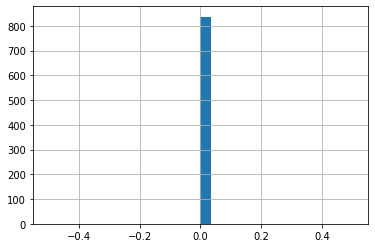

In [ ]:

dataset_train[dataset_train.Pesticide_Use_Category == 1].Number_Weeks_Used.hist(bins=30)
     

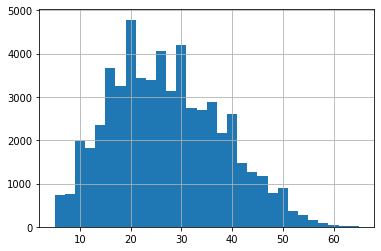

In [ ]:

dataset_train[dataset_train.Pesticide_Use_Category == 2].Number_Weeks_Used.hist(bins=30)
     

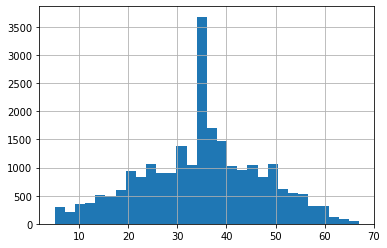

In [ ]:

dataset_train[dataset_train.Pesticide_Use_Category == 3].Number_Weeks_Used.hist(bins=30)
     

In [ ]:

dataset_train[dataset_train.Pesticide_Use_Category == 2].Number_Weeks_Used.value_counts()

25.0    8973
20.0    3290
30.0    2849
15.0    2150
22.0    1897
        ... 
62.0      10
61.0       9
63.0       3
64.0       2
65.0       2
Name: Number_Weeks_Used, Length: 61, dtype: int64

In [ ]:
dataset_test.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.478804,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.076839,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.135651,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.456388,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.130433,0.009077,0.027197
Number_Weeks_Used,0.478804,0.076839,-0.135651,0.456388,0.130433,1.000000,-0.375889,0.012536
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.375889,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.012536,0.030281,1.000000


In [ ]:
dataset_test.shape

(1199, 9)

In [ ]:
dataset_tr

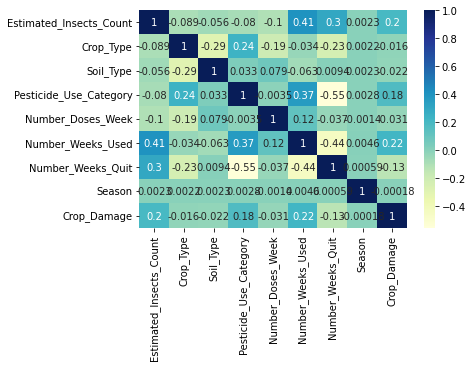

In [ ]:
import seaborn as sns
dataplot = sns.heatmap(dataset_train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

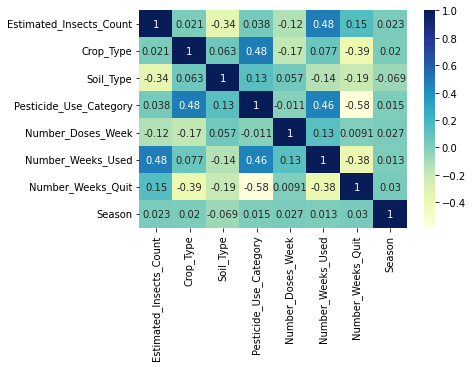

In [ ]:

dataplot = sns.heatmap(dataset_test.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
dataset_train.skew()

<ipython-input-38-f3a6d48224de>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_train.skew()


Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.267528
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

In [ ]:
dataset_test.skew()

<ipython-input-39-7147de3a0d9e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_test.skew()


Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.186671
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

Imputing missing values

In [ ]:
dataset_train['Number_Weeks_Used'] = dataset_train['Number_Weeks_Used'].fillna(dataset_train.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))
dataset_test['Number_Weeks_Used'] = dataset_test['Number_Weeks_Used'].fillna(dataset_test.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))

In [ ]:
data = dataset_train.loc[:, ["Pesticide_Use_Category", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]]
     

In [ ]:
data

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,1,0,0.0,0
1,1,0,0.0,0
2,1,0,0.0,0
3,1,0,0.0,0
4,1,0,0.0,0
...,...,...,...,...
88853,2,10,12.0,44
88854,2,10,20.0,38
88855,2,15,40.0,8
88856,2,10,25.0,18


In [ ]:
data[data.Pesticide_Use_Category == 2.0].describe()
     

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,63709.0,63709.000000,63709.000000,63709.000000
mean,2.0,26.564222,26.452103,13.375614
std,0.0,15.632950,10.399819,9.278006
min,2.0,5.000000,5.000000,0.000000
25%,2.0,15.000000,19.000000,6.000000
50%,2.0,20.000000,25.000000,12.000000
75%,2.0,40.000000,33.000000,19.000000
max,2.0,95.000000,65.000000,50.000000


In [ ]:

data[data.Pesticide_Use_Category == 3.0]

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
24,3,30,26.0,0
25,3,40,20.0,0
26,3,60,15.0,0
27,3,20,14.0,0
28,3,20,15.0,0
...,...,...,...,...
87071,3,5,50.0,0
87072,3,20,55.0,0
87073,3,20,55.0,0
87074,3,5,40.0,0


In [ ]:

data[data.Pesticide_Use_Category == 3.0].describe()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,24312.0,24312.000000,24312.000000,24312.0
mean,3.0,24.868172,34.856491,0.0
std,0.0,14.783622,12.344633,0.0
min,3.0,5.000000,5.000000,0.0
25%,3.0,15.000000,26.000000,0.0
50%,3.0,20.000000,35.000000,0.0
75%,3.0,35.000000,43.000000,0.0
max,3.0,95.000000,67.000000,0.0


In [ ]:

data[data.Pesticide_Use_Category == 1.0].describe()
     

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,837.0,837.0,837.0,837.0
mean,1.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,0.0
75%,1.0,0.0,0.0,0.0
max,1.0,0.0,0.0,0.0


In [ ]:
data.corr()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
Pesticide_Use_Category,1.000000,-0.003498,0.366089,-0.554169
Number_Doses_Week,-0.003498,1.000000,0.121194,-0.037131
Number_Weeks_Used,0.366089,0.121194,1.000000,-0.441301
Number_Weeks_Quit,-0.554169,-0.037131,-0.441301,1.000000


In [ ]:

data["Total_Doses_Used"] = data.Number_Doses_Week*data.Number_Weeks_Used
     



In [ ]:

data["Number_Doses_Monthly"] = data.Total_Doses_Used/30.0
data["Number_Doses_Daily"] = data.Total_Doses_Used/360.0
data["Number_Days_Quit"] = data.Number_Weeks_Quit*7.0

In [ ]:

data.head()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
0,1,0,0.0,0,0.0,0.0,0.0,0.0
1,1,0,0.0,0,0.0,0.0,0.0,0.0
2,1,0,0.0,0,0.0,0.0,0.0,0.0
3,1,0,0.0,0,0.0,0.0,0.0,0.0
4,1,0,0.0,0,0.0,0.0,0.0,0.0


In [ ]:

data.describe()
     

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,2.264186,25.849952,28.502420,9.589986,759.166367,25.305546,2.108795,67.129904
std,0.461772,15.554428,11.872304,9.900631,574.109977,19.136999,1.594750,69.304418
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,15.000000,20.000000,0.000000,340.000000,11.333333,0.944444,0.000000
50%,2.000000,20.000000,27.000000,7.000000,620.000000,20.666667,1.722222,49.000000
75%,3.000000,40.000000,36.000000,16.000000,1020.000000,34.000000,2.833333,112.000000
max,3.000000,95.000000,67.000000,50.000000,5510.000000,183.666667,15.305556,350.000000


In [ ]:
dataset_train.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [ ]:
dataset_test.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [ ]:
df=pd.read_csv('train_data.csv')

In [ ]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
X

array([[1.88000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.09000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.57000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.51600000e+03, 1.00000000e+00, 0.00000000e+00, ...,
        6.00000000e+02, 2.00000000e+01, 1.66666667e+00],
       [3.70200000e+03, 1.00000000e+00, 0.00000000e+00, ...,
        2.50000000e+02, 8.33333333e+00, 6.94444444e-01],
       [3.89500000e+03, 1.00000000e+00, 0.00000000e+00, ...,
        7.40000000e+02, 2.46666667e+01, 2.05555556e+00]])

In [ ]:
y

array([  0.,   0.,   0., ...,  56., 126.,  49.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.405081,0.299279,0.002304,0.202888,0.124636,0.124636,0.124636,0.299279
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.033891,-0.233394,0.002161,-0.016495,-0.152939,-0.152939,-0.152939,-0.233394
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.063460,0.009364,0.002327,-0.021997,0.022568,0.022568,0.022568,0.009364
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.366089,-0.554169,0.002811,0.175002,0.146240,0.146240,0.146240,-0.554169
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.121194,-0.037131,-0.001401,-0.030874,0.827865,0.827865,0.827865,-0.037131
Number_Weeks_Used,0.405081,-0.033891,-0.063460,0.366089,0.121194,1.000000,-0.441301,0.004554,0.220752,0.564094,0.564094,0.564094,-0.441301
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.441301,1.000000,0.000595,-0.133117,-0.258925,-0.258925,-0.258925,1.000000
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004554,0.000595,1.000000,-0.000184,0.000027,0.000027,0.000027,0.000595
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.220752,-0.133117,-0.000184,1.000000,0.107013,0.107013,0.107013,-0.133117
Total_Doses_Used,0.124636,-0.152939,0.022568,0.146240,0.827865,0.564094,-0.258925,0.000027,0.107013,1.000000,1.000000,1.000000,-0.258925


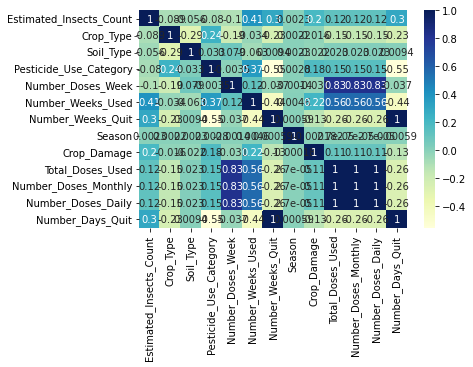

In [ ]:
import seaborn as sns
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
df[df.Pesticide_Use_Category == 1.0].describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
count,837.000000,837.000000,837.000000,837.0,837.0,837.0,837.0,837.000000,837.000000,837.0,837.0,837.0,837.0
mean,1650.673835,0.555556,0.502987,1.0,0.0,0.0,0.0,1.849462,1.056153,0.0,0.0,0.0,0.0
std,1105.694378,0.497201,0.500290,0.0,0.0,0.0,0.0,0.664399,0.579103,0.0,0.0,0.0,0.0
min,150.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
25%,677.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0
50%,1478.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,2.000000,1.000000,0.0,0.0,0.0,0.0
75%,2401.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,2.000000,1.000000,0.0,0.0,0.0,0.0
max,4097.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,3.000000,2.000000,0.0,0.0,0.0,0.0


In [ ]:
df[df.Pesticide_Use_Category == 2.0].describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
count,63709.000000,63709.000000,63709.000000,63709.0,63709.000000,63709.000000,63709.000000,63709.000000,63709.000000,63709.000000,63709.000000,63709.000000,63709.000000
mean,1436.093268,0.208746,0.446766,2.0,26.564222,26.452103,13.375614,1.896938,0.116624,725.041281,24.168043,2.014004,93.629299
std,833.623765,0.406416,0.497162,0.0,15.632950,10.399819,9.278006,0.701796,0.352619,549.654604,18.321820,1.526818,64.946042
min,150.000000,0.000000,0.000000,2.0,5.000000,5.000000,0.000000,1.000000,0.000000,25.000000,0.833333,0.069444,0.000000
25%,789.000000,0.000000,0.000000,2.0,15.000000,19.000000,6.000000,1.000000,0.000000,320.000000,10.666667,0.888889,42.000000
50%,1296.000000,0.000000,0.000000,2.0,20.000000,25.000000,12.000000,2.000000,0.000000,600.000000,20.000000,1.666667,84.000000
75%,1898.000000,0.000000,1.000000,2.0,40.000000,33.000000,19.000000,2.000000,0.000000,1000.000000,33.333333,2.777778,133.000000
max,4097.000000,1.000000,1.000000,2.0,95.000000,65.000000,50.000000,3.000000,2.000000,4560.000000,152.000000,12.666667,350.000000


In [ ]:
df[df.Pesticide_Use_Category == 3.0].describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
count,24312.000000,24312.000000,24312.000000,24312.0,24312.000000,24312.000000,24312.0,24312.000000,24312.000000,24312.000000,24312.000000,24312.000000,24312.0
mean,1293.178142,0.473223,0.487414,3.0,24.868172,34.856491,0.0,1.898651,0.354516,874.726473,29.157549,2.429796,0.0
std,868.748140,0.499293,0.499852,0.0,14.783622,12.344633,0.0,0.701288,0.591350,613.785538,20.459518,1.704960,0.0
min,150.000000,0.000000,0.000000,3.0,5.000000,5.000000,0.0,1.000000,0.000000,25.000000,0.833333,0.069444,0.0
25%,577.000000,0.000000,0.000000,3.0,15.000000,26.000000,0.0,1.000000,0.000000,400.000000,13.333333,1.111111,0.0
50%,1132.000000,0.000000,0.000000,3.0,20.000000,35.000000,0.0,2.000000,0.000000,750.000000,25.000000,2.083333,0.0
75%,1786.000000,1.000000,1.000000,3.0,35.000000,43.000000,0.0,2.000000,1.000000,1200.000000,40.000000,3.333333,0.0
max,4097.000000,1.000000,1.000000,3.0,95.000000,67.000000,0.0,3.000000,2.000000,5510.000000,183.666667,15.305556,0.0


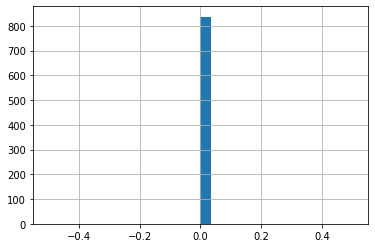

In [ ]:

df[df.Pesticide_Use_Category == 1].Number_Weeks_Used.hist(bins=30)
     

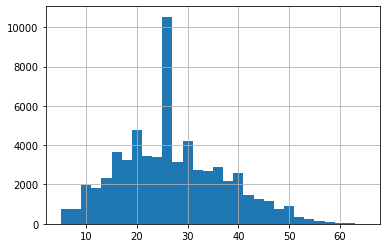

In [ ]:

df[df.Pesticide_Use_Category == 2].Number_Weeks_Used.hist(bins=30)
     

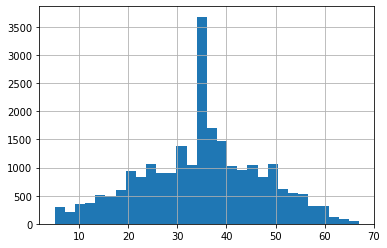

In [ ]:

df[df.Pesticide_Use_Category == 3].Number_Weeks_Used.hist(bins=30)
     

In [ ]:

df["Total_Doses_Used"] = df.Number_Doses_Week*data.Number_Weeks_Used
     



In [ ]:

df["Number_Doses_Monthly"] = df.Total_Doses_Used/30.0
df["Number_Doses_Daily"] = df.Total_Doses_Used/360.0
df["Number_Days_Quit"] = df.Number_Weeks_Quit*7.0

In [ ]:
df.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
Total_Doses_Used           0
Number_Doses_Monthly       0
Number_Doses_Daily         0
Number_Days_Quit           0
dtype: int64

In [ ]:
df['Number_Weeks_Used'] = df['Number_Weeks_Used'].fillna(df.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))


In [ ]:
df.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
Total_Doses_Used           0
Number_Doses_Monthly       0
Number_Doses_Daily         0
Number_Days_Quit           0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(max_depth=17)
model1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=17)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
y_pred=sgd.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         7.0       1.00      1.00      1.00       517
        14.0       1.00      1.00      1.00       551
        21.0       1.00      1.00      1.00       507
        28.0       1.00      1.00      1.00       513
        35.0       1.00      1.00      1.00       582
        42.0       1.00      1.00      1.00       526
        49.0       1.00      1.00      1.00       496
        56.0       1.00      1.00      1.00       467
        63.0       1.00      1.00      1.00       383
        70.0       1.00      1.00      1.00       550
        77.0       1.00      1.00      1.00       438
        84.0       1.00      1.00      1.00       517
        91.0       1.00      1.00      1.00       504
        98.0       1.00      1.00      1.00       520
       105.0       1.00      1.00      1.00       531
       112.0       1.00      1.00      1.00       433
       119.0       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
